### UMAP, K-means and HDBSscan


####**UMAP**

- Creates k-NN graph as all-neighbors graph to embedd high-dimensional data into lower dimensions.
- Embedding, dimentionality reduction and scale
- EDA for feature discovery, pre-processing, clustering and analysis.

GPU-Accelerate with cuML, end-to-end GPU workflow.

####GPU UMAP

In [ ]:
import sys, os, shutil
from IPython import get_ipython
# Install plotly for interactive visualizations
!pip install plotly
!pip install --upgrade scipy scikit-learn

[2026-01-16 09:02:12.628] [CUML] [info] Building knn graph using brute force (configured from build_algo='auto')
[2026-01-16 09:02:12.698] [CUML] [info] Building knn graph using brute force (configured from build_algo='auto')


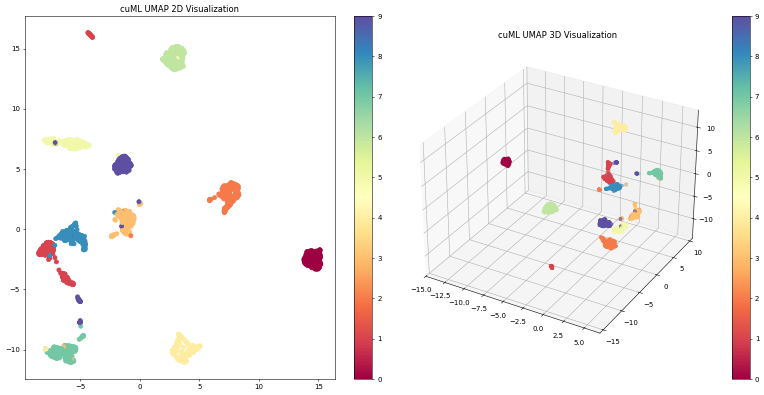

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from cuml.manifold import UMAP  # Changed to import UMAP from cuML
from cuml.cluster import KMeans
import matplotlib.pyplot as plt

# Load example data (handwritten digits dataset)
data, labels = load_digits(return_X_y=True)

# cuML UMAP for 2D and 3D visualization
umap_2d = UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding_2d = umap_2d.fit_transform(data)
umap_3d = UMAP(n_neighbors=15, min_dist=0.1, n_components=3)
embedding_3d = umap_3d.fit_transform(data)

# Create a single figure with two subplots
fig = plt.figure(figsize=(16, 8), dpi=50) # Adjust figure size for two plots

# Subplot for 2D embedding
ax1 = fig.add_subplot(121) # 1 row, 2 columns, 1st subplot
scatter_2d = ax1.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=labels, cmap='Spectral')
fig.colorbar(scatter_2d, ax=ax1)
ax1.set_title("cuML UMAP 2D Visualization")

# Subplot for 3D embedding
ax2 = fig.add_subplot(122, projection='3d') # 1 row, 2 columns, 2nd subplot
scatter_3d = ax2.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:,2], c=labels, cmap='Spectral')
fig.colorbar(scatter_3d, ax=ax2)
ax2.set_title("cuML UMAP 3D Visualization")

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


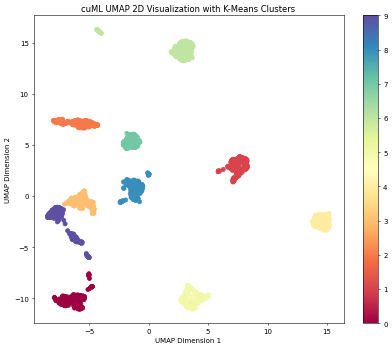

In [ ]:
# Apply K-means clustering to the 2D UMAP embeddings
kmeans_model = KMeans(n_clusters=10, random_state=0) # Assuming 10 clusters for digits dataset
cluster_labels = kmeans_model.fit_predict(embedding_2d)

# Visualize the 2D UMAP embedding with K-means clusters
plt.figure(figsize=(10, 8), dpi=50)
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_labels, cmap='Spectral')
plt.colorbar(scatter)
plt.title("cuML UMAP 2D Visualization with K-Means Clusters")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()